# Creating some figures 

In [203]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cm

In [204]:
import warnings
#warnings.filterwarnings("ignore")

In [205]:
# load data

file_name = "data/Rockall-Trough-Mooring-Time-Series-2020.nc"
ds = xr.open_dataset(file_name)

ds

<xarray.Dataset>
Dimensions:   (DEPTH: 101, TIME: 4667)
Coordinates:
  * TIME      (TIME) datetime64[ns] 2014-06-01 ... 2020-10-20
Dimensions without coordinates: DEPTH
Data variables: (12/14)
    PRES      (DEPTH) float32 ...
    TG_EAST   (TIME, DEPTH) float32 ...
    TG_WEST   (TIME, DEPTH) float32 ...
    SG_EAST   (TIME, DEPTH) float32 ...
    SG_WEST   (TIME, DEPTH) float32 ...
    U_WEST_1  (TIME, DEPTH) float32 ...
    ...        ...
    U_WEST_2  (TIME, DEPTH) float32 ...
    V_WEST_2  (TIME, DEPTH) float32 ...
    W_WEST_2  (TIME, DEPTH) float32 ...
    U_EAST    (TIME, DEPTH) float32 ...
    V_EAST    (TIME, DEPTH) float32 ...
    W_EAST    (TIME, DEPTH) float32 ...
Attributes: (12/24)
    title:                         CLASS Rockall Trough mooring data 06/2014-...
    institution:                   Scottish Association for Marine Science, S...
    history:                       Delayed time processed quality controlled
    id:                            Rockall-Trough-Mooring-Time-Series-2020
    source:                        subsurface mooring
    project:                       Climate Linked Atlantic Sector Science
    ...                            ...
    citation:                      These data were collected and made freely ...
    acknowledgement:               Funding source: the UK Natural Environment...
    date_created:                  2021-04-15T23:49:44Z
    date_modified:                 2021-04-15T23:49:44Z
    processing_level:              
    QC_indicator:

In [252]:
#ds.TIME.dt.hour.plot.line('.');
ds.TIME.dt.hour
ds.TG_EAST["DEPTH"]


<xarray.DataArray 'DEPTH' (DEPTH: 101)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100])
Dimensions without coordinates: DEPTH

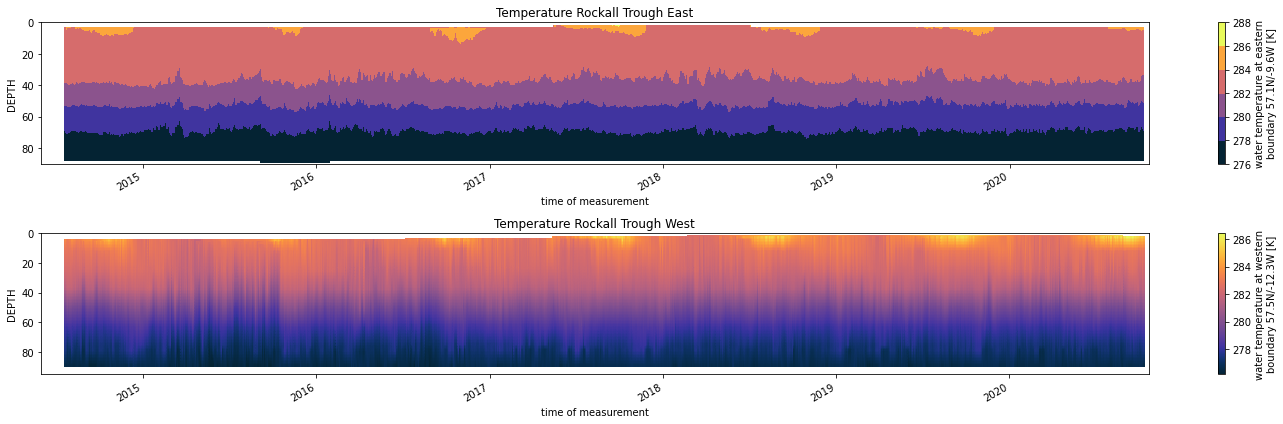

In [220]:
fig, ax = plt.subplots(2, 1, figsize = (20, 6))

ds.TG_EAST.plot.contourf(ax=ax[0], x = 'TIME', y = 'DEPTH', ylim = (90, 0), cmap = cm.cm.thermal);
ax[0].set_title("Temperature Rockall Trough East");
ds.TG_WEST.plot(ax=ax[1], x = 'TIME', ylim = (95, 0), cmap = cm.cm.thermal);
ax[1].set_title("Temperature Rockall Trough West");

#use ... .plot.contourf ... to get a more clearly defined colorbar and use yincrease = False instead of ylim = (100, 0)

fig.tight_layout();

In [ ]:
# try and slice the dataset ... so that I only get the temperature data of one spcific depth

In [268]:
ds.TG_WEST.sel(DEPTH = 20)

<xarray.DataArray 'TG_WEST' (TIME: 4667)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * TIME     (TIME) datetime64[ns] 2014-06-01 2014-06-01T12:00:00 ... 2020-10-20
Attributes:
    standard_name:    sea_water_conservative_temperature
    units:            K
    coordinates:      TIME DEPTH
    long_name:        water temperature at western boundary 57.5N/-12.3W
    reference_scale:  ITS-90
    QC_indicator:     good data
    valid_min:        0.0
    valid_max:        100.0

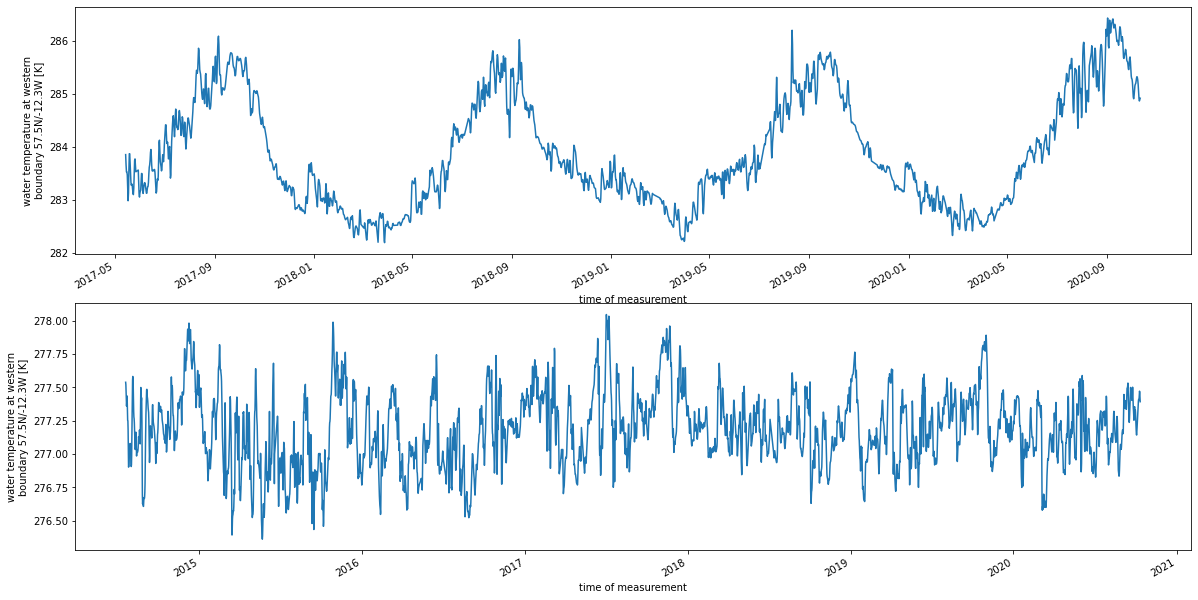

In [262]:
fig, ax = plt.subplots(2, 1, figsize = (20, 10))
ds.TG_WEST[:,3].plot(ax=ax[0]);
ds.TG_WEST[:,80].plot(ax=ax[1]);

In [199]:
# depth is in decibar (negeting 1 bar pressure at surface) -› it is a 20 db grid so 1 = 20 db 
temp10 = ds.TG_WEST[:,10] # = 200db = 200m
temp80 = ds.TG_WEST[:,80] # = 1600db = 1600m

In [200]:
temp10degC = (temp10)-272.15
temp80degC = (temp80)-272.15

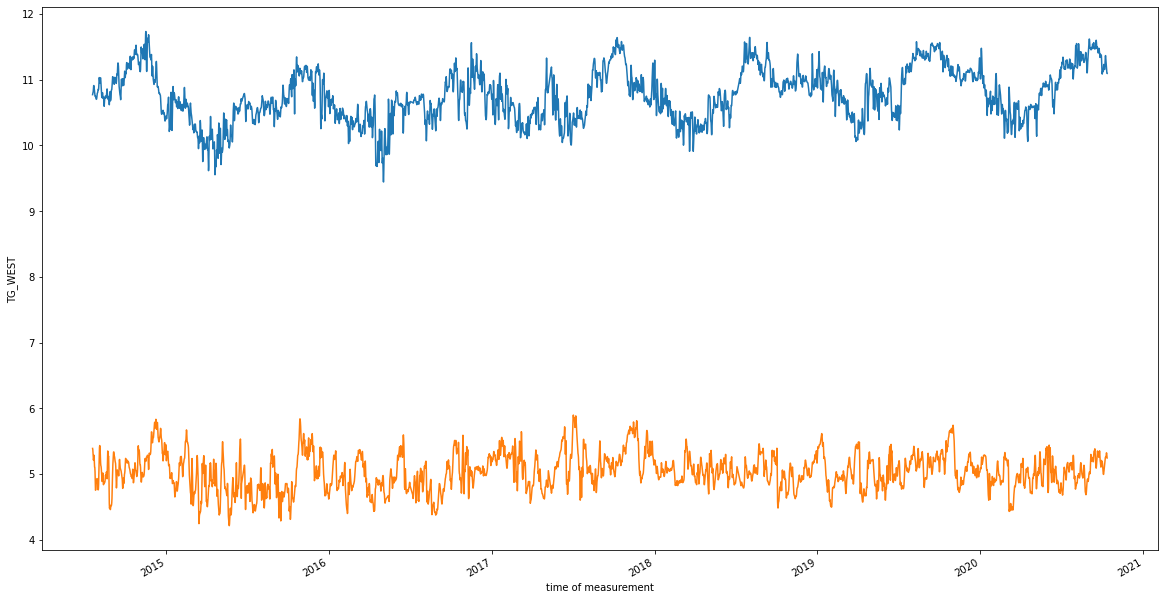

In [202]:
temp10degC.plot(figsize = (20, 10));
temp80degC.plot();


In [281]:
#temp100 = (ds.TG_WEST.sel(DEPTH = 5))-272.15
temp200 = (ds.TG_WEST.sel(DEPTH = 10))-272.15
temp400 = (ds.TG_WEST.sel(DEPTH = 20))-272.15
temp600 = (ds.TG_WEST.sel(DEPTH = 30))-272.15
temp800 = (ds.TG_WEST.sel(DEPTH = 40))-272.15
temp1000 = (ds.TG_WEST.sel(DEPTH = 50))-272.15
temp1200 = (ds.TG_WEST.sel(DEPTH = 60))-272.15
temp1400 = (ds.TG_WEST.sel(DEPTH = 70))-272.15
temp1600 = (ds.TG_WEST.sel(DEPTH = 80))-272.15
temp1800 = (ds.TG_WEST.sel(DEPTH = 90))-272.15


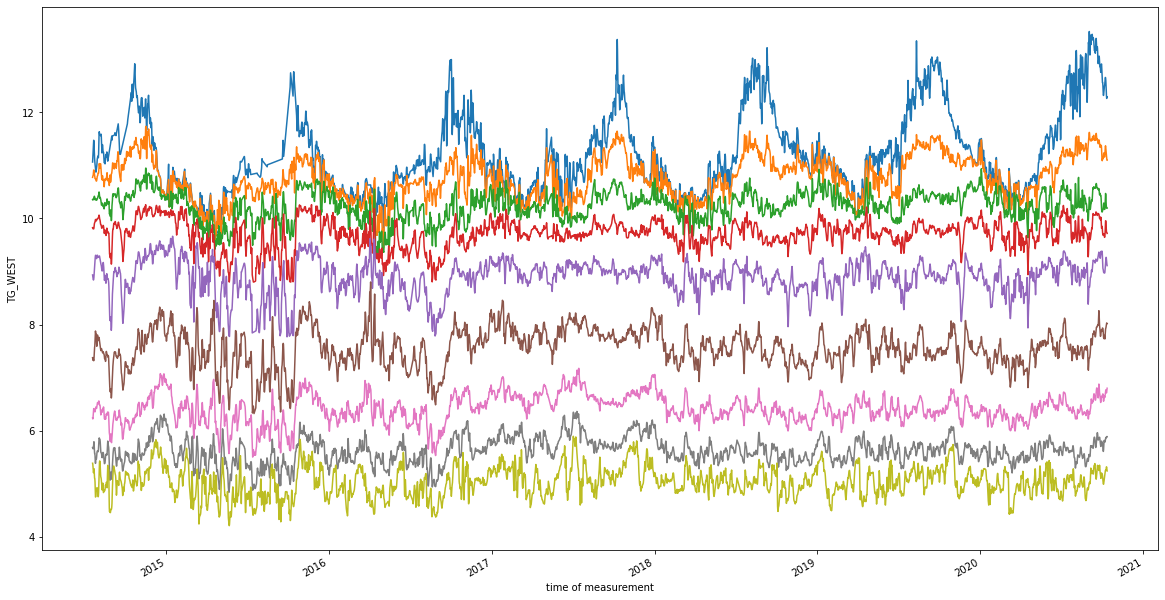

In [315]:
## tried to plot them all but failed...

#fig, ax_arr = plt.subplots(3, 3, sharex = True, figsize = (20, 15))
#for ax, vname in zip(ax_arr.flat, temp[200:1800, 200]):   
#    vname.plot(ax=ax).line('.');
    
#fig, ax = plt.subplots(3, 3, figsize = (20, 15))
#ax[0].plot(temp100);


#temp100.plot(ax=ax[0]).line('.');

temp100.plot(figsize = (20,10));
temp200.plot();
temp400.plot();
temp600.plot();
temp800.plot();
temp1000.plot();
temp1200.plot();
temp1400.plot();
temp1600.plot();
temp1800.plot();

In [270]:
import marineHeatWaves as mhw

In [274]:
# lets see what I can do 
# mhws, clim = mhw.detect(t, sst) I will try to pick out time from TG_WEST dataset and use temp800 for the st (sea temperature)

t = ds.TG_WEST['TIME'].dt.day
st = temp800

In [275]:
mhws, clim = mhw.detect(t, st)

In [276]:
mhws['n_events']

0

In [316]:
st = temp100

In [317]:
mhws, clim = mhw.detect(t, st)

In [318]:
mhws['n_events']

0

# Summary
what I did here was not very efficient or practical but it sort of gave me an idea what I was doing...
### Key points
- DEPTH is in a 20db grid -› this means that DEPTH 20 = 20*20db ~400m
- TIME resolution
- the algorithm did not detect anything for the data I fed it ... ~100 & 800m depth
- BUT I did not use my own climatology so I have no idea what the baseline is the algorithm tried to compare my data to or if the mhw package claculates the climatology from the availabel data??